<a href="https://colab.research.google.com/github/fatemafaria142/Bangla-Reading-Comprehension-Based-Question-Answering/blob/main/Bangla_Question_Answering_using_BanglaT5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.util import ngrams

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Loading Dataset**
* UDDIPOK: Reading Comprehension Based Question Answering Dataset in Bangla Language
* Dataset link: https://data.mendeley.com/datasets/s9pb3h2cjy/1

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/RC_Dataset.csv')
df.head()

,Unnamed: 0,passage,question,ans_txt,strt_ind
0,0,বাংলাদেশ একটি ক্ষুদ্র আয়তনের জনবহুল দেশ এ দেশে...,বাংলাদেশের আয়তন কত বর্গকিলোমিটার,১৪৭৫৭০,53
1,1,বাংলাদেশ একটি ক্ষুদ্র আয়তনের জনবহুল দেশ এ দেশে...,মোট আয়তনের কত শতাংশ বনভূমি,১৭,93
2,2,বাংলাদেশ একটি ক্ষুদ্র আয়তনের জনবহুল দেশ এ দেশে...,বাংলাদেশের রাজধানীর নাম কি,ঢাকা,133
3,3,বাংলাদেশ একটি ক্ষুদ্র আয়তনের জনবহুল দেশ এ দেশে...,বাংলাদেশে মোট কয়টি বিভাগীয় শহর রয়েছে,আটটি,152
4,4,বাংলাদেশের মোট জনসংখ্যা প্রায় ১৬ কোটির মতো পৃথ...,বাংলাদেশের মোট জনসংখ্যা প্রায় কোটি,১৬,30


# **Before droping any NaN**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Splitting the data into 80% training, 10% testing, and 10% validation
train_data, temp = train_test_split(df, test_size=0.2, random_state=42)
test_data, validation_data = train_test_split(temp, test_size=0.5, random_state=42)

# Checking the lengths of the splits
print("Train Dataset Length:",len(train_data))
print("Test Dataset Length:",len(test_data))
print("Validation Dataset Length:",len(train_data))

Train Dataset Length: 2908
Test Dataset Length: 364
Validation Dataset Length: 2908


# **80% data for training**

In [ ]:
# Extracting specific columns from train_data DataFrame
new_df_train = train_data[['passage', 'question', 'ans_txt']]

# Saving the new DataFrame to a CSV file
new_df_train.to_csv('/content/drive/MyDrive/QA_Dataset/new_file_train.csv', index=False)


# **10% data for testing**

In [ ]:
# Extracting specific columns from train_data DataFrame
new_df_test= test_data[['passage', 'question', 'ans_txt']]

# Saving the new DataFrame to a CSV file
new_df_test.to_csv('/content/drive/MyDrive/QA_Dataset/new_file_test.csv', index=False)


# **10% data for validation**

In [ ]:
# Extracting specific columns from train_data DataFrame
new_df_validation = validation_data[['passage', 'question', 'ans_txt']]

# Saving the new DataFrame to a CSV file
new_df_validation.to_csv('/content/drive/MyDrive/QA_Dataset/new_file_validation.csv', index=False)


# **Main Dataset**

# **Train dataset**

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/QA_Dataset/new_file_train.csv')
df_train.head()

,passage,question,ans_txt
0,চিকিৎসাক্ষেত্রে বিজ্ঞানের ব্যাপক সাফল্য এসেছে ...,যেমন গ্লুকোমিটার যন্ত্রের মাধ্যমে মূত্র কি করে...,পরীক্ষা
1,তিনি ইংরেজ সরকারের কাছে তাঁর প্রতিবাদপত্রে লিখ...,তিনি ইংরেজ সরকারের কাছে তাঁর কিসে লিখেছিলেন এক...,প্রতিবাদপত্রে
2,বাংলা বর্ষপঞ্জি অনুযায়ী বছরের প্রথম দুই মাস ব...,এই সময় কিসের প্রচন্ড তাপে উত্তপ্ত হয়ে ওঠে ভূ...,সূর্যের
3,কেরম্যাকম্যাককেন্ড্রিক তাদের বিখ্যাত এসআইআর সা...,কেরম্যাকম্যাককেন্ড্রিক তাদের বিখ্যাত এসআইআর সা...,রোগের
4,ল্যাটিন শব্দ কম্পিউট Compute থেকে কম্পিউটার কথ...,কম্পিউটার যেসব কি নিয়ে কাজ করে তাকে ডেটা বলে...,তথ্য


# **Checking NaN values in train dataset**

In [ ]:
# Check for NaN values in df_train
nan_count = df_train.isna().sum()

# Display columns with NaN values and their respective counts
print("Columns with NaN values:")
print(nan_count[nan_count > 0])


Columns with NaN values:
question    1
dtype: int64


In [ ]:
# Find the row with NaN value in the 'question' column
row_with_nan = df_train[df_train['question'].isnull()]
print("Row with NaN value in 'question' column:")
print(row_with_nan)


Row with NaN value in 'question' column:
                                                passage question       ans_txt
1434  সেই ছেলেটি সারাক্ষণ নানা দিক থেকে সমানে তৈরি ক...      NaN  সত্যজিৎ রায়


In [ ]:
# Remove rows with NaN values in the 'question' column
df_train = df_train.dropna(subset=['question'])

# Verify that NaN values have been removed
nan_count = df_train.isna().sum()
print("Columns with NaN values after removing:")
print(nan_count[nan_count > 0])


Columns with NaN values after removing:
Series([], dtype: int64)


# **Visualization of Passage, Question, and Answer Length of Training Dataset**

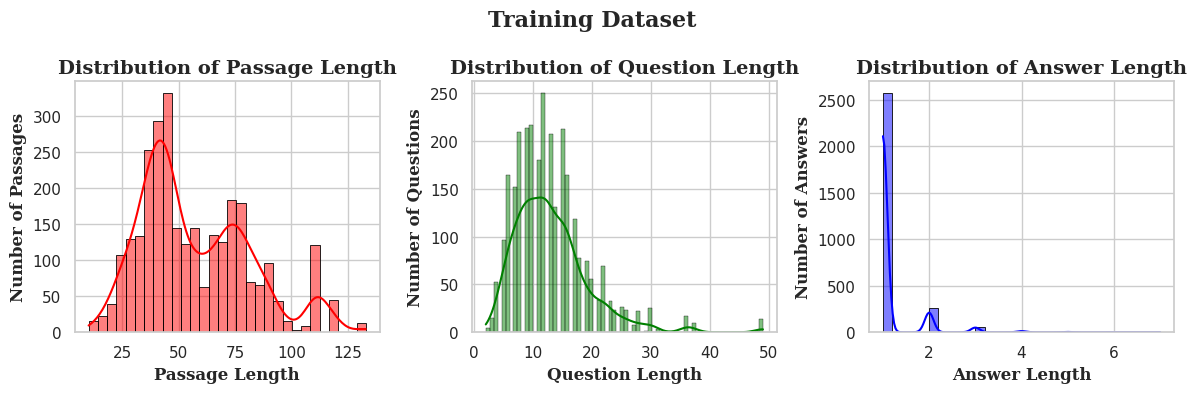

In [ ]:
# Calculate the lengths of the columns
df_train['passage_length'] = df_train['passage'].apply(lambda x: len(str(x).split()))
df_train['question_length'] = df_train['question'].apply(lambda x: len(str(x).split()))
df_train['answer_length'] = df_train['ans_txt'].apply(lambda x: len(str(x).split()))

# Set the aesthetic style and font settings
sns.set(style="whitegrid")
font_label = {'fontfamily': 'serif', 'fontsize': 12, 'fontweight': 'bold'}
font_title = {'fontfamily': 'serif', 'fontsize': 14, 'fontweight': 'bold'}

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 1 row, 3 columns

# Plot 1: Distribution of Passage Length
sns.histplot(data=df_train, x='passage_length', bins=30, kde=True, edgecolor='black', color='red', ax=axes[0])
axes[0].set_title('Distribution of Passage Length', fontdict=font_title)
axes[0].set_xlabel('Passage Length', fontdict=font_label)
axes[0].set_ylabel('Number of Passages', fontdict=font_label)

# Plot 2: Distribution of Question Length
sns.histplot(data=df_train, x='question_length', bins=70, kde=True, edgecolor='black', color='green', ax=axes[1])
axes[1].set_title('Distribution of Question Length', fontdict=font_title)
axes[1].set_xlabel('Question Length', fontdict=font_label)
axes[1].set_ylabel('Number of Questions', fontdict=font_label)

# Plot 3: Distribution of Answer Length
sns.histplot(data=df_train, x='answer_length', bins=30, kde=True, edgecolor='black', color='blue', ax=axes[2])
axes[2].set_title('Distribution of Answer Length', fontdict=font_title)
axes[2].set_xlabel('Answer Length', fontdict=font_label)
axes[2].set_ylabel('Number of Answers', fontdict=font_label)

# Set a title for the set of subplots
plt.suptitle('Training Dataset', fontfamily='serif',fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# **Count of unique words for passage and question in Train Dataset**

In [ ]:
# Tokenize 'passage' and 'question' columns to count unique words
passage_words = ' '.join(df_train['passage']).split()
question_words = ' '.join(df_train['question']).split()

# Calculate unique words
unique_passage_words = len(set(passage_words))
unique_question_words = len(set(question_words))

# Display the count of unique words
print(f"Number of unique words in 'passage': {unique_passage_words}")
print(f"Number of unique words in 'question': {unique_question_words}")

Number of unique words in 'passage': 4086
Number of unique words in 'question': 3442


# **Test dataset**

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/QA_Dataset/new_file_test.csv')
df_test.head()

,passage,question,ans_txt
0,তৃতীয় বিশ্বের মধ্যম আয়ের দেশ হিসেবে বাংলাদেশ...,তৃতীয় বিশ্বের কেমন আয়ের দেশ হিসেবে বাংলাদেশে...,মধ্যম
1,প্রচলিত বিশ্বাসের উর্দ্ধে উঠে বিচার করলে দেখা ...,প্রচলিত বিশ্বাসের উর্দ্ধে উঠে বিচার করলে দেখা ...,লড়াইতে
2,পুলিশ ছাত্র জনসমাবেশের উপর গুলি চালায় ফলে রফিক...,এই ঘটনা কাকে এক নতুন মাত্রা দান করে এবং রাজনৈত...,আন্দোলনকে
3,দীর্ঘদিন একটানা আর্সেনিক দূষিত পানি পান ও দূষি...,কিসের তালু খসখসে হয়,হাতপায়ের
4,ব্রিটিশ সরকারের ওই সিদ্ধান্তের প্রতিবাদে বাংলা...,ব্রিটিশ সরকারের ওই সিদ্ধান্তের প্রতিবাদে বাংলা...,ব্রিটিশ


# **Checking NaN values in test dataset**

In [ ]:
# Check for NaN values in df_train
nan_count = df_test.isna().sum()

# Display columns with NaN values and their respective counts
print("Columns with NaN values:")
print(nan_count[nan_count > 0])


Columns with NaN values:
Series([], dtype: int64)


# **Visualization of Passage, Question, and Answer Length of Testing Dataset**

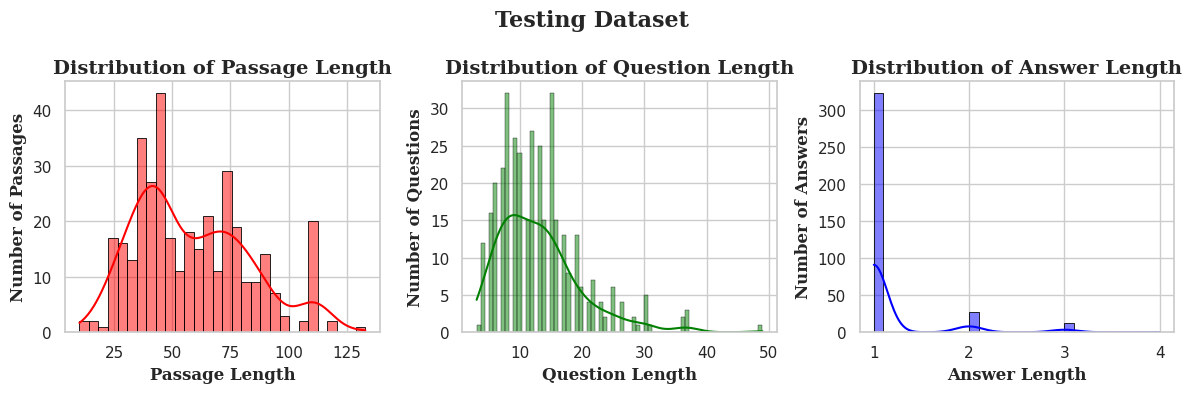

In [ ]:
# Calculate the lengths of the columns
df_test['passage_length'] = df_test['passage'].apply(lambda x: len(str(x).split()))
df_test['question_length'] = df_test['question'].apply(lambda x: len(str(x).split()))
df_test['answer_length'] = df_test['ans_txt'].apply(lambda x: len(str(x).split()))

# Set the aesthetic style and font settings
sns.set(style="whitegrid")
font_label = {'fontfamily': 'serif', 'fontsize': 12, 'fontweight': 'bold'}
font_title = {'fontfamily': 'serif', 'fontsize': 14, 'fontweight': 'bold'}

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 1 row, 3 columns

# Plot 1: Distribution of Passage Length
sns.histplot(data=df_test, x='passage_length', bins=30, kde=True, edgecolor='black', color='red', ax=axes[0])
axes[0].set_title('Distribution of Passage Length', fontdict=font_title)
axes[0].set_xlabel('Passage Length', fontdict=font_label)
axes[0].set_ylabel('Number of Passages', fontdict=font_label)

# Plot 2: Distribution of Question Length
sns.histplot(data=df_test, x='question_length', bins=70, kde=True, edgecolor='black', color='green', ax=axes[1])
axes[1].set_title('Distribution of Question Length', fontdict=font_title)
axes[1].set_xlabel('Question Length', fontdict=font_label)
axes[1].set_ylabel('Number of Questions', fontdict=font_label)

# Plot 3: Distribution of Answer Length
sns.histplot(data=df_test, x='answer_length', bins=30, kde=True, edgecolor='black', color='blue', ax=axes[2])
axes[2].set_title('Distribution of Answer Length', fontdict=font_title)
axes[2].set_xlabel('Answer Length', fontdict=font_label)
axes[2].set_ylabel('Number of Answers', fontdict=font_label)

# Set a title for the set of subplots
plt.suptitle('Testing Dataset', fontfamily='serif',fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# **Count of unique words for passage and question in Test Dataset**

In [ ]:
# Tokenize 'passage' and 'question' columns to count unique words
passage_words = ' '.join(df_test['passage']).split()
question_words = ' '.join(df_test['question']).split()

# Calculate unique words
unique_passage_words = len(set(passage_words))
unique_question_words = len(set(question_words))

# Display the count of unique words
print(f"Number of unique words in 'passage': {unique_passage_words}")
print(f"Number of unique words in 'question': {unique_question_words}")

Number of unique words in 'passage': 3346
Number of unique words in 'question': 1794


# **Validation dataset**

In [ ]:
df_validation = pd.read_csv('/content/drive/MyDrive/QA_Dataset/new_file_validation.csv')
df_validation.head()

,passage,question,ans_txt
0,মানুষের দ্বারা লিখিত ইতিহাস মাত্র কয়েক হাজার ব...,দীর্ঘ সময়ের পরিক্রমায় আমাদের জানা একমাত্র বসবা...,লক্ষ লক্ষ
1,টাইম ট্রাভেল বা সময় ভ্রমণ এটি আসলে সময়ের অক্ষ ...,এই তিনটি কি বরাবর স্থান পরিবর্তন সম্ভব,মাত্রা
2,আবহাওয়া ও জলবায়ুর উপর ভিত্তি করে ৬টি ঋতুতে ভ...,সকল ঋতুর বিরাজকাল সমান নাহলেও কিসের সুবিধার্থে...,হিসাবের
3,আধুনিক যুগ বিজ্ঞানের অব্যাহত অগ্রগতি ও জয়যাত্...,বিভিন্ন ধরনের রােগের চিকিৎসায় নিত্যনতুন ওষু...,বেড়েছে
4,ব্রিটিশ সরকারের ওই সিদ্ধান্তের প্রতিবাদে বাংলা...,ব্রিটিশ সরকারের ওই সিদ্ধান্তের প্রতিবাদে বাংলা...,পণ্য


# **Checking NaN values in validation dataset**

In [ ]:
# Check for NaN values in df_train
nan_count = df_validation.isna().sum()

# Display columns with NaN values and their respective counts
print("Columns with NaN values:")
print(nan_count[nan_count > 0])


Columns with NaN values:
Series([], dtype: int64)


# **Visualization of Passage, Question, and Answer Length of Validation Dataset**

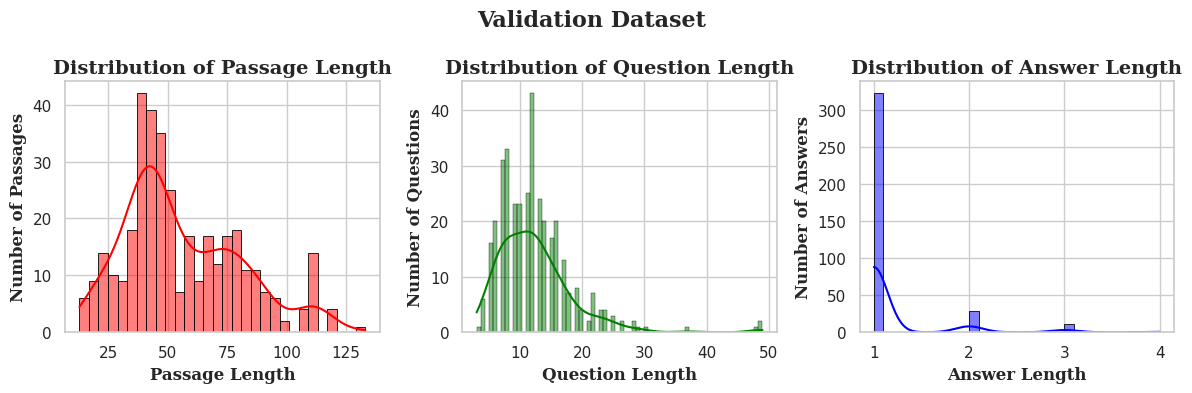

In [ ]:
# Calculate the lengths of the columns
df_validation['passage_length'] = df_validation['passage'].apply(lambda x: len(str(x).split()))
df_validation['question_length'] = df_validation['question'].apply(lambda x: len(str(x).split()))
df_validation['answer_length'] = df_validation['ans_txt'].apply(lambda x: len(str(x).split()))

# Set the aesthetic style and font settings
sns.set(style="whitegrid")
font_label = {'fontfamily': 'serif', 'fontsize': 12, 'fontweight': 'bold'}
font_title = {'fontfamily': 'serif', 'fontsize': 14, 'fontweight': 'bold'}

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 1 row, 3 columns

# Plot 1: Distribution of Passage Length
sns.histplot(data=df_validation, x='passage_length', bins=30, kde=True, edgecolor='black', color='red', ax=axes[0])
axes[0].set_title('Distribution of Passage Length', fontdict=font_title)
axes[0].set_xlabel('Passage Length', fontdict=font_label)
axes[0].set_ylabel('Number of Passages', fontdict=font_label)

# Plot 2: Distribution of Question Length
sns.histplot(data=df_validation, x='question_length', bins=70, kde=True, edgecolor='black', color='green', ax=axes[1])
axes[1].set_title('Distribution of Question Length', fontdict=font_title)
axes[1].set_xlabel('Question Length', fontdict=font_label)
axes[1].set_ylabel('Number of Questions', fontdict=font_label)

# Plot 3: Distribution of Answer Length
sns.histplot(data=df_validation, x='answer_length', bins=30, kde=True, edgecolor='black', color='blue', ax=axes[2])
axes[2].set_title('Distribution of Answer Length', fontdict=font_title)
axes[2].set_xlabel('Answer Length', fontdict=font_label)
axes[2].set_ylabel('Number of Answers', fontdict=font_label)

# Set a title for the set of subplots
plt.suptitle('Validation Dataset', fontfamily='serif',fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# **Count of unique words for passage and question in Validation Dataset**

In [ ]:
# Tokenize 'passage' and 'question' columns to count unique words
passage_words = ' '.join(df_validation['passage']).split()
question_words = ' '.join(df_validation['question']).split()

# Calculate unique words
unique_passage_words = len(set(passage_words))
unique_question_words = len(set(question_words))

# Display the count of unique words
print(f"Number of unique words in 'passage': {unique_passage_words}")
print(f"Number of unique words in 'question': {unique_question_words}")

Number of unique words in 'passage': 3335
Number of unique words in 'question': 1768


# **Checking length of the datasets**

In [ ]:
print("Train Dataset Length: ",len(df_train))
print("Test Dataset Length: ",len(df_test))
print("Validation Dataset Length: ",len(df_validation))

Train Dataset Length:  2907
Test Dataset Length:  364
Validation Dataset Length:  364


# **Installing Necesary Libraries**

In [ ]:
!pip install git+https://github.com/csebuetnlp/normalizer

  Cloning https://github.com/csebuetnlp/normalizer to /tmp/pip-req-build-e6e02536
  Running command git clone --filter=blob:none --quiet https://github.com/csebuetnlp/normalizer /tmp/pip-req-build-e6e02536
  Resolved https://github.com/csebuetnlp/normalizer to commit d405944dde5ceeacb7c2fd3245ae2a9dea5f35c9
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.0/185.0 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for normalizer: filename=normalizer-0.0.1-py3-none-any.whl size=6857 sha256=797ea505ed6271d9f94044887be857fb0be418347b67223a6f2d99a7983ea170
  Stored in directory: /tmp/pip-ephem-wheel-cache-r6_yvoxh/wheels/2e/79/9c/cd96d490298305d51d2da11484bb2c25fd1f759a6906708282
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186457 sha256=d4de95a565c823d9c6b6a5e5a7169645757546c

In [ ]:
!pip install transformers[sentencepiece]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.1/311.1 kB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 34.3 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
!pip install torch

In [ ]:
!pip install accelerate -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 4.8 MB/s eta 0:00:00


In [ ]:
!transformers-cli cache clear

2023-11-15 05:57:52.268850: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-15 05:57:52.268904: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-15 05:57:52.268944: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-15 05:57:55.180267: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
usage: transformers-cli <command> [<args>]
Transformers CLI tool: error: argument {convert,download,env,run,serve,login,whoami,logout,repo,add-new-model,add-new-model-like,lfs-enable-largefiles,lfs-multipart-upload,pt-to-tf}: invalid choi

In [ ]:
!pip install transformers==4.10.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.7/212.7 kB 14.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 22.9 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tokenizers
Failed to build tokenizers
ERROR: Could not build wheels for tokenizers, which is required to install pyproject.toml-based projects


In [ ]:
!pip install accelerate==0.20.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.24.1
    Uninstalling accelerate-0.24.1:
      Successfully uninstalled accelerate-0.24.1


In [ ]:
!pip install transformers[torch]

In [ ]:
!pip install sentencepiece

In [ ]:
!pip install --upgrade transformers

# **Apply normalization to the datasets**

In [ ]:
from normalizer import normalize
# Apply normalization to the datasets
df_train['passage'] = df_train['passage'].apply(normalize)
df_train['question'] = df_train['question'].apply(normalize)
df_train['ans_txt'] = df_train['ans_txt'].apply(normalize)

df_validation['passage'] = df_validation['passage'].apply(normalize)
df_validation['question'] = df_validation['question'].apply(normalize)
df_validation['ans_txt'] = df_validation['ans_txt'].apply(normalize)

df_test['passage'] = df_test['passage'].apply(normalize)
df_test['question'] = df_test['question'].apply(normalize)
df_test['ans_txt'] = df_test['ans_txt'].apply(normalize)


# **BanglaT5 Model and Its Tokenizer**

In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
from normalizer import normalize # pip install git+https://github.com/csebuetnlp/normalizer

model = AutoModelForSeq2SeqLM.from_pretrained("csebuetnlp/banglat5")
tokenizer = AutoTokenizer.from_pretrained("csebuetnlp/banglat5", use_fast=True) #sentencepiece library is required to instantiate the fast tokenizer

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


# **Custom dataset class**

In [ ]:
from torch.utils.data import Dataset, DataLoader

class BanglaQADataset(Dataset):
    def __init__(self, data, tokenizer, max_length=250):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        context = self.data.iloc[idx]['passage']
        question = self.data.iloc[idx]['question']
        answer = self.data.iloc[idx]['ans_txt']

        # Tokenize context and question separately
        inputs = self.tokenizer(
            context,
            question,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        # Tokenize answer
        tokenized_answer = self.tokenizer(
            answer,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        # Process tokenized answer labels
        labels = tokenized_answer['input_ids'].squeeze()
        attention_mask_labels = tokenized_answer['attention_mask'].squeeze()

        # Ignore padded tokens during training
        labels[attention_mask_labels == 0] = -100

        # Handle cases where the input sequence is longer than max_length
        if inputs['input_ids'].shape[1] > self.max_length:
            inputs['input_ids'] = inputs['input_ids'][:, :self.max_length]
            inputs['attention_mask'] = inputs['attention_mask'][:, :self.max_length]
            attention_mask_labels = attention_mask_labels[:self.max_length]

        # Ensuring labels and attention_mask_labels have the same length
        labels = labels[:self.max_length]

        # Using .squeeze() on labels
        labels = labels.squeeze()

        # Return as dictionaries
        return {
            'input_ids': inputs['input_ids'].squeeze(),
            'attention_mask': inputs['attention_mask'].squeeze(),
            'labels': labels,

        }


# **Create datasets and data loaders**

In [ ]:
train_dataset = BanglaQADataset(df_train, tokenizer)
validation_dataset = BanglaQADataset(df_validation, tokenizer)
test_dataset = BanglaQADataset(df_test, tokenizer)

train_dataloader = DataLoader(train_dataset , batch_size=10, shuffle=True)
validation_dataloader = DataLoader(validation_dataset , batch_size=10, shuffle=False)
test_dataloader = DataLoader(test_dataset , batch_size=10, shuffle=False)

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

T5ForConditionalGeneration(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseGatedActDense(
              (wi_0): Linear(in_features=768, out_features=2048, bias=False)
              (wi_1): Linear(in_features=768, out_features=2048, bias=False)
              (wo):

# **Train Dataset Encoding Printing: context, question, answer(input_ids,attention_mask)**

In [ ]:
# Set a flag to track whether it's the first batch
first_batch = True

for batch in train_dataloader:
    # Move inputs and labels to the GPU
    inputs = {key: value.to(device) for key, value in batch.items()}  # Using 'batch' directly

    # Extract information for the first example in the batch
    input_ids = inputs['input_ids'][0]
    attention_mask = inputs['attention_mask'][0]
    labels = inputs['labels'][0]


    # Print information
    print("Input IDs:", input_ids)
    print("Attention Mask:", attention_mask)
    print("Labels:", labels)


    # Break out of the loop after processing the first batch
    break


Input IDs: tensor([23263,   523,  7060,   100, 11208, 21917, 20406,    15,  2136,  2397,
        12701,  2136,    16,    35,  4961,  3010,  8719,    17,   217,    54,
          376,   135,    60,  3010,   125, 19085, 10564,    11,   442,   766,
            9,    20, 27663,  3958,     9,   758,   607,   151,   103,   155,
          350,   297,    23, 17185,   442,   142,  1305,  1543,  2136,    17,
           23,  1392,    63, 25731,    57,   442,   142,  1305, 10014,   185,
         1239,  8629,   392,   252, 10967, 30144,  5571,   271, 28090,    11,
          375, 30318,  2136,  2032,   442,    33,   107,     9,   169, 10745,
           49,    12,    25, 10275, 15918,  4916,   107,     9,   169,    49,
         5309,    10,  4815,  8878, 19663,   297,   107,   104,   994,   185,
          361,    53,  2172,  1397,   758,  9404,   104,   917,  3107,  1457,
        10564,    16, 17185,   142,  1223,   917,   442,  3958,     6, 19663,
          917,  5309,    10,  4815,  2684,   107,   1

# **Validation Dataset Encoding: context, question, answer(input_ids,attention_mask)**

In [ ]:
# Set a flag to track whether it's the first batch
first_batch = True

for batch in validation_dataloader:
    # Move inputs and labels to the GPU
    inputs = {key: value.to(device) for key, value in batch.items()}  # Using 'batch' directly

    # Extract information for the first example in the batch
    input_ids = inputs['input_ids'][0]
    attention_mask = inputs['attention_mask'][0]
    labels = inputs['labels'][0]


    # Print information
    print("Input IDs:", input_ids)
    print("Attention Mask:", attention_mask)
    print("Labels:", labels)


    # Break out of the loop after processing the first batch
    break


Input IDs: tensor([  223,   792,  3131,   992,   432,   465,   216,   410,   444,   958,
          992,   484,  5334,   521,   410,    14,  1136,   995,  1821,  5662,
         1043,    74,   335,   939,  3183,  3682,    14, 20404, 11256,   168,
         1015,  1015,  5991,  2938,    36,  5762,  1173, 14087,    10,   701,
          130,    91, 10589,   880,    13,    14,  1173, 14087,     6,    53,
           69,    62,   160,    69, 30501,    57,   997,   682,    12,   958,
         2938, 12145,  2574,     6,   131,    59, 30501,    57, 13596,   701,
           54,  1673,     9,  1027,  3340,   138, 25209,   995,  1173, 14087,
         7187, 10842, 14087,    10,  1671,   254,    25,  6982,   222,   958,
         2938, 10798,  4812,   346, 11125,  2266,    13,     9,   390,    12,
         2616,   262,  1700, 16924,     7,  7187, 10842, 14087,  4488,   994,
          736, 26817,     6,  1405,   838,   168,  2584,    13,   397,  6461,
        20472,     7,   322, 13199,  4070,  1175,  53

# **Test Dataset Encoding: context, question, answer(input_ids,attention_mask)**


In [ ]:
# Set a flag to track whether it's the first batch
first_batch = True

for batch in test_dataloader:
    # Move inputs and labels to the GPU
    inputs = {key: value.to(device) for key, value in batch.items()}  # Using 'batch' directly

    # Extract information for the first example in the batch
    input_ids = inputs['input_ids'][0]
    attention_mask = inputs['attention_mask'][0]
    labels = inputs['labels'][0]


    # Print information
    print("Input IDs:", input_ids)
    print("Attention Mask:", attention_mask)
    print("Labels:", labels)


    # Break out of the loop after processing the first batch
    break


Input IDs: tensor([ 1328,  1117, 11583,  5302,   415,   186,   948,    92,  3781, 18760,
        21313,  5694,   836,  1787,    12,    45,  4309,   447,   137,   103,
         2136,  1960, 11210,  3864,  2136,    86,    95,    10,    68,   223,
           81,  1002, 28691,   281,  1743,    89,  8878,   189,   560, 18734,
           13,  4382,   219,    80,  5546,   506,   361, 22261,   575,  9032,
         1808,   447,   173,  2136,  6778,   262, 11892,   557,    68,   514,
        11212,  5434,    37,   709,   744,   155,   102,  2884,  8878, 25012,
          482,   103,    32,    23,  7663,  2433,    11,  1757,     9,  1803,
          103,     1,  1328,  1117,   273,  5302,   415,   186,   948,    92,
         3781, 18760, 21313,  5694,   836,  1787,     1,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,    

# **Train Dataset Decoding: context, question, and answer**
* converting the tensor values to human-readable tokens

In [ ]:
# Set a flag to track whether it's the first batch
first_batch = True

for batch in train_dataloader:
    # Move inputs and labels to the GPU
    inputs = {key: value.to(device) for key, value in batch.items()}

    # Extract information for the first example in the batch
    input_ids = inputs['input_ids'][0]
    attention_mask = inputs['attention_mask'][0]
    labels = inputs['labels'][0]


    # Check for problematic token IDs causing overflow error during decoding
    problematic_ids = torch.nonzero((input_ids < 0) | (input_ids >= tokenizer.vocab_size))
    if problematic_ids.numel() > 0:
        print("Problematic Token IDs:", input_ids[problematic_ids])
        print("Problematic Token Positions:", problematic_ids)
        # Handle the problematic input IDs as needed
        raise ValueError("Problematic token IDs detected")

    # Decode and print input text
    decoded_input_text = tokenizer.decode(input_ids.clamp(0, tokenizer.vocab_size - 1), skip_special_tokens=True)
    print("Decoded Input Text:", decoded_input_text)
    print("Attention Mask:", attention_mask)

    # Decode and print labels
    decoded_labels = tokenizer.decode(labels.clamp(0, tokenizer.vocab_size - 1), skip_special_tokens=True)
    print("Labels:", decoded_labels)



    # Break out of the loop after processing the first batch
    break


Decoded Input Text: বাংলা বর্ষপঞ্জি অনুয়ায়ী গ্রীষ্মের পরের ঋতুটিই হলো বর্ষাকাল সেসময় প্রচন্ড ও মুষলধারে বৃষ্টিপাত গ্রীষ্মকালের সব তপ্ততা মিটিয়ে দেয় রাস্তাঘাট বেশ কর্দমাক্ত থাকে নদীনালা বেশ ভরাট হয়ে প্রকৃতিতে নতুন মাত্রা জাগিয়ে তোলে আষাঢ় ও শ্রাবণ মাস মিলে বর্ষাকাল গঠিত এ সময় নদী নালা খালবিল জলে পূর্ণ হয় রাস্তাঘাট কেমন কর্দমাক্ত থাকে
Attention Mask: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,


# **Validation Dataset Decoding: context, question, and answer**
* converting the tensor values to human-readable tokens

In [ ]:
# Set a flag to track whether it's the first batch
first_batch = True

for batch in validation_dataloader:
    # Move inputs and labels to the GPU
    inputs = {key: value.to(device) for key, value in batch.items()}

    # Extract information for the first example in the batch
    input_ids = inputs['input_ids'][0]
    attention_mask = inputs['attention_mask'][0]
    labels = inputs['labels'][0]


    # Check for problematic token IDs causing overflow error during decoding
    problematic_ids = torch.nonzero((input_ids < 0) | (input_ids >= tokenizer.vocab_size))
    if problematic_ids.numel() > 0:
        print("Problematic Token IDs:", input_ids[problematic_ids])
        print("Problematic Token Positions:", problematic_ids)
        # Handle the problematic input IDs as needed
        raise ValueError("Problematic token IDs detected")

    # Decode and print input text
    decoded_input_text = tokenizer.decode(input_ids.clamp(0, tokenizer.vocab_size - 1), skip_special_tokens=True)
    print("Decoded Input Text:", decoded_input_text)
    print("Attention Mask:", attention_mask)

    # Decode and print labels
    decoded_labels = tokenizer.decode(labels.clamp(0, tokenizer.vocab_size - 1), skip_special_tokens=True)
    print("Labels:", decoded_labels)



    # Break out of the loop after processing the first batch
    break


Decoded Input Text: মানুষের দ্বারা লিখিত ইতিহাস মাত্র কয়েক হাজার বছরের হলেও পৃথিবীর ইতিহাস ৪৬০ কোটি বছরের এই দীর্ঘ সময়ের পরিক্রমায় আমাদের জানা একমাত্র বসবাসযোগ্য এই গ্রহে বিচরণ করেছে লক্ষ লক্ষ প্রজাতির প্রাণী কিন্তু কালের মহাস্রোতে হারিয়ে গেছে তাদের ৯৯ শতাংশই এই মহাস্রোতের কিছু সময় ছিল যখন সময় চোরাবালিতে রূপ নেয় আর পৃথিবীর প্রাণীকূল অসহায়ের মতো সেই চোরাবালিতে চিরতরে হারিয়ে যায় নির্দিষ্ট করে বললে ইতিহাসে ঠিক পাঁচবার সময়ের মহাস্রোত এরূপ চোরাস্রোতে পরিণত হয়েছিল যে স্রোতগুলো পৃথিবীর প্রাণীবৈচিত্র্য একপ্রকার ধ্বংসই করে দিয়েছে আর গণবিলুপ্তির এরূপ চোরাস্রোত সৃষ্টির পেছনে মূল নিয়ামকের ভূমিকা পালন করেছে প্রকৃতিই কখনো বৃহৎ আগ্নেয়গিরির অগ্ন্যুৎপাত বড় আকারের ভৌগোলিক পরিবর্তন জলবায়ু পরিবর্তন কিংবা বড় বড় উল্কা পতনই ঘটিয়েছিল এসব গণবিলুপ্তি দীর্ঘ সময়ের পরিক্রমায় আমাদের জানা একমাত্র বসবাসযোগ্য এই গ্রহে বিচরণ করেছে কত প্রজাতির প্রাণী
Attention Mask: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

# **Test Dataset Decoding: context, question, and answer**
* converting the tensor values to human-readable tokens

In [ ]:
# Set a flag to track whether it's the first batch
first_batch = True

for batch in test_dataloader:
    # Move inputs and labels to the GPU
    inputs = {key: value.to(device) for key, value in batch.items()}

    # Extract information for the first example in the batch
    input_ids = inputs['input_ids'][0]
    attention_mask = inputs['attention_mask'][0]
    labels = inputs['labels'][0]


    # Check for problematic token IDs causing overflow error during decoding
    problematic_ids = torch.nonzero((input_ids < 0) | (input_ids >= tokenizer.vocab_size))
    if problematic_ids.numel() > 0:
        print("Problematic Token IDs:", input_ids[problematic_ids])
        print("Problematic Token Positions:", problematic_ids)
        # Handle the problematic input IDs as needed
        raise ValueError("Problematic token IDs detected")

    # Decode and print input text
    decoded_input_text = tokenizer.decode(input_ids.clamp(0, tokenizer.vocab_size - 1), skip_special_tokens=True)
    print("Decoded Input Text:", decoded_input_text)
    print("Attention Mask:", attention_mask)

    # Decode and print labels
    decoded_labels = tokenizer.decode(labels.clamp(0, tokenizer.vocab_size - 1), skip_special_tokens=True)
    print("Labels:", decoded_labels)


    # Break out of the loop after processing the first batch
    break


Decoded Input Text: তৃতীয় বিশ্বের মধ্যম আয়ের দেশ হিসেবে বাংলাদেশে আজ প্রযুক্তির বহুমুখী উৎকর্ষ সাধন খুবই জরুরি আর সে কাজটি সম্ভব হতে পারে কম্পিউটার নামক যন্ত্রের সাহায্যে কম্পিউটার এখনাে সব মানুষের কাছে সহজসাধ্য হয়নি যেহেতু আমরা কম্পিউটারের প্রায় সকল যন্ত্রাংশই আমদানি করি তাই এক্ষেত্রে সরকারের বিশেষ প্রণোদনা দেয়া আবশ্যক তাছাড়া সম্ভব হলে কম্পিউটার ক্রয়বিক্রয়ে সব রকম ভ্যাট প্রত্যাহার করা উচিত যাতে মানুষ খুব সহজেই কম্পিউটারের সান্নিধ্যে আসতে পারে এবং তার জীবনকে উন্নত ও আধুনিক করে তুলতে পারে তৃতীয় বিশ্বের কেমন আয়ের দেশ হিসেবে বাংলাদেশে আজ প্রযুক্তির বহুমুখী উৎকর্ষ সাধন খুবই জরুরি
Attention Mask: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# **Training Arguments**

In [ ]:
from transformers import TrainingArguments
from torch.optim import AdamW


# Create a custom optimizer using torch.optim.AdamW
custom_optimizer = AdamW(
    model.parameters(),
    lr=1e-3,  # Learning rate
    eps=1e-8,  # Epsilon value to prevent division by zero
    weight_decay=0.01,  # Weight decay (L2 regularization)
)

# Define the TrainingArguments for question answering
training_args = TrainingArguments(
    output_dir='/content/drive/MyDrive/QA_Dataset/BanglaT5_QA',
    num_train_epochs=3,
    per_device_train_batch_size=1,
    gradient_accumulation_steps=8,  # Accumulate gradients over 8 small batches
    evaluation_strategy="steps",
    eval_steps=500,
    save_total_limit=2,
    save_steps=500,
    learning_rate=1e-3,
    do_train=True,
    do_eval=True,
    remove_unused_columns=False,
    push_to_hub=False,
    report_to="none",
    load_best_model_at_end=True,
    lr_scheduler_type="cosine_with_restarts",  # Setting the learning rate scheduler type
    warmup_steps=100,  # Number of warmup steps
    weight_decay=0.01,  # Weight decay (L2 regularization)
    logging_dir='/content/drive/MyDrive/QA_Dataset/BanglaT5_QA',  # Using the same directory for logs
    logging_steps=500,  # Log every 500 steps
)


# **Custom Data Collator for Question Answering**
* A custom data collator for question answering is used to handle the specific data formatting required for training models on question answering tasks. It facilitates the processing of input data into a format suitable for model training by performing tasks such as padding, truncation, and organizing inputs and labels for the QA model.

In [ ]:
import torch
import torch.nn.functional as F
from transformers import DataCollatorForSeq2Seq

class CustomDataCollatorForSeq2Seq(DataCollatorForSeq2Seq):
    def __call__(self, features):
        batch = super().__call__(features)

        # Find the maximum length of labels in the batch
        max_label_length = max(feature["labels"].shape[-1] for feature in features)

        # Pad or truncate the "labels" arrays to have the same length
        batch["labels"] = torch.stack([
            F.pad(torch.as_tensor(feature["labels"]), (0, max_label_length - feature["labels"].shape[-1]), value=-100)
            for feature in features
        ])

        return batch




# Creating a data collator using the custom collator
data_collator = CustomDataCollatorForSeq2Seq(
    tokenizer=tokenizer,
    model=model,
    padding=True,
    max_length=250,
    label_pad_token_id=tokenizer.pad_token_id,
    pad_to_multiple_of=8  # Ensuring the sequence length is a multiple of 8 (adjust as needed)
)

# **Trainer**
'''The trainer package provides utilities to write re-usable training scripts. The core idea is to use a trainer that implements a nested loop, where the outer loop runs the data collection steps and the inner loop the optimization steps.'''

In [ ]:
from transformers import Trainer
# Define the Trainer with the custom optimizer
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
    optimizers=(custom_optimizer, None),  # Passing the custom optimizer here
)


# **Training Starts Here**

In [ ]:
# Fine-tune the model
trainer.train()

You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2632: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


Step,Training Loss,Validation Loss
500,1.424600,1.573885
1000,1.042100,1.426884


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2632: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2632: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(
There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight'].


TrainOutput(global_step=1089, training_loss=1.2095061162943355, metrics={'train_runtime': 1652.1263, 'train_samples_per_second': 5.279, 'train_steps_per_second': 0.659, 'total_flos': 2982803027263488.0, 'train_loss': 1.2095061162943355, 'epoch': 3.0})

# **Saving model and tokenizer**

In [ ]:
# Save the model
model.save_pretrained('/content/drive/MyDrive/QA_Dataset/BanglaT5_QA/Bangla_QA_BanglaT5_Model.pt')

# Save the tokenizer
tokenizer.save_pretrained('/content/drive/MyDrive/QA_Dataset/BanglaT5_QA/Bangla_QA_BanglaT5_Tokenizer.json')


('/content/drive/MyDrive/QA_Dataset/BanglaT5_QA/Bangla_QA_BanglaT5_Tokenizer.json/tokenizer_config.json',
 '/content/drive/MyDrive/QA_Dataset/BanglaT5_QA/Bangla_QA_BanglaT5_Tokenizer.json/special_tokens_map.json',
 '/content/drive/MyDrive/QA_Dataset/BanglaT5_QA/Bangla_QA_BanglaT5_Tokenizer.json/spiece.model',
 '/content/drive/MyDrive/QA_Dataset/BanglaT5_QA/Bangla_QA_BanglaT5_Tokenizer.json/added_tokens.json',
 '/content/drive/MyDrive/QA_Dataset/BanglaT5_QA/Bangla_QA_BanglaT5_Tokenizer.json/tokenizer.json')

# **Loading trained model and tokenizer**

In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

# Load the saved model
model = AutoModelForSeq2SeqLM.from_pretrained('/content/drive/MyDrive/QA_Dataset/BanglaT5_QA/Bangla_QA_BanglaT5_Model.pt')

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained('/content/drive/MyDrive/QA_Dataset/BanglaT5_QA/Bangla_QA_BanglaT5_Tokenizer.json')


# **Evaluation Metrics Installing**

In [ ]:
!pip install evaluate

In [ ]:
!pip install sacrebleu

In [ ]:
!pip install rouge_score

In [ ]:
!pip install jiwer

# **Testing the model**

In [ ]:
decoded_predictions_batch = []
decoded_references_batch = []

# Loop through the test dataset and generate predictions
for batch in test_dataloader:
    inputs = batch['input_ids'].to('cuda')  # Move inputs to the 'cuda' device
    labels = batch['labels'].to('cuda')  # Move labels to the 'cuda' device

    # Ensuring the model, inputs, and labels are on the same device
    model = model.to(inputs.device)

    # Generating answers using our model
    with torch.no_grad():
        # Generating predictions
        predictions = model.generate(inputs, max_length=250, num_beams=4, early_stopping=True)

        # Decoding generated answers
        try:
            decoded_predictions_batch.extend(tokenizer.batch_decode(predictions.cpu(), skip_special_tokens=True))
        except Exception as e:
            print("Exception occurred during decoding (predictions):", e)


        # Decoding labels for references
        try:
            # Converting labels to a list of token IDs
            labels_list = labels.cpu()
             # Decoding each label sequence
            decoded_references_batch.extend([tokenizer.decode(ids.clamp(0, tokenizer.vocab_size - 1), skip_special_tokens=True) for ids in labels_list])
        except Exception as e:
            print("Exception occurred during decoding (references):", e)



In [ ]:
print(decoded_predictions_batch)

['কম্পিউটার ', 'নির্ণয় ', 'বাংলা', 'আর্সেনিক', 'রাজনৈতিক', 'রাজনৈতিক', 'পূর্ব পাকিস্তানের', 'রবীন্দ্রনাথ ঠাকুর', 'কম্পিউটার ', 'রবীন্দ্রনাথ ঠাকুর', 'রাজনৈতিক', 'কম্পিউটার ', 'শিক্ষালাভ', 'গ্রীষ্মকাল', 'পূর্ব পাকিস্তানের', 'বর্ষাকাল', 'শিক্ষার ', 'যমুনা', 'আর্সেনিক', 'পূর্ব পাকিস্তানের', 'ক্ষমতা ', 'কম্পিউটার ', 'নজরুল ', 'জনস্বাস্থ্যের', 'নজরুল ', 'নজরুল ', 'কম্পিউটার ', 'রবীন্দ্রনাথ ঠাকুর', 'আর্সেনিক', 'আর্সেনিক', 'পূর্ব পাকিস্তানের', 'গ্রীষ্মকাল', 'কম্পিউটার ', 'কম্পিউটার ', 'কম্পিউটার ', 'কম্পিউটার ', 'কম্পিউটার ', 'রবীন্দ্রনাথ ঠাকুর', 'নজরুল ', 'কম্পিউটার ', 'নজরুল ', 'পূর্ব পাকিস্তানের', 'টাইম ট্রাভেল', 'সবুজ', 'বৌদ্ধধর্মের', 'আর্সেনিক', 'পূর্ব পাকিস্তানের', 'প্রথম', 'রবীন্দ্রনাথ ঠাকুর', 'পূর্ব পাকিস্তানের', 'ব্রিটিশ ', 'কম্পিউটার ', 'টাইম ট্রাভেল', 'শিক্ষালাভ', 'টাইম ট্রাভেল', 'মেয়েদের ', 'নির্ণয় ', 'কম্পিউটার ', 'রাজনৈতিক', 'কম্পিউটার ', 'সবুজ', 'শিক্ষালাভ', 'স্বাধীন', 'শিক্ষালাভ', 'প্রথম', 'একটি', 'গ্রীষ্মকাল', 'ব্রিটিশ', 'আর্সেনিক', 'পিরামিডে', 'আর্সেনিক ', 'কম্পিউটার ', 'ব

In [ ]:
print(len(decoded_predictions_batch))

364


In [ ]:
print( decoded_references_batch)

['মধ্যম', 'লড়াইতে', 'আন্দোলনকে', 'হাতপায়ের', 'ব্রিটিশ ', 'চুপ', '১৯৪৮', 'বাইরে ', 'কারখানা ', '১৮৯১', 'সায়', 'যন্ত্রটি ', 'ইমাম ', 'বিভক্ত', 'পূর্ব পাকিস্তান', 'রাস্তাঘাট', 'বাড়িতে ', 'পদ্মার', 'রােগ প্রতিরােধ', 'আনুষ্ঠানিকভাবে', 'বাঙ্গালীর', 'নিরাময়ে ', 'নক্ষত্র', 'ধারণা', 'এক ', 'কর্মীও', 'নতুন ', 'চিত্রা', 'ছােপ', 'আর্সেনিক', 'জনগণ', 'তিনটি', 'ইন্টারনেট', 'ভূমিকা ', 'আলোর', 'ব্যাটসম্যান', 'নিয়ন ও অন্যান্য', 'শিলাইদহে', 'কথা', 'উচ্চ ', 'পশ্চিমবঙ্গের', 'পুরোপুরি ', 'বিভ্রম', 'অগ্রহায়ণ', 'আয়ত্ত', 'তাপেও', '২৪ পরগণা ', 'অ্যাকাডেমি', 'একটা ', 'স্টিমারে', 'আমেরিকা', 'সাফল্যের ', 'মাত্রা', 'এক', 'সরণ', 'পরিণত ', 'ডিফারেন্সিয়াল ইকুয়েশন', 'তিনটি', 'বন্দী', 'সম্ভব', 'দোয়েল', 'সৈয়দ আহমদ শহীদের', 'যুদ্ধে ', 'কাজী ফকির আহমেদ', '১৯৭৫১৯৮৫', 'হোটেলের', 'ঋতুতে', 'ইংরেজ', 'পানি', 'পিরামিড', 'কয়েক ', 'ইন্টারনেট', 'হীনযান ', 'কম্পিউটারের ', 'ইলন মাস্ক', 'এসআইআর', 'উন্নত ', 'শুরু', 'প্যারাডক্স', 'বিভিন্ন ', 'বিশ্বভ্রমণে', 'ডিজে কিমারে', 'কাব্যগ্রন্থ', 'সমাজ', 'বৈজ্ঞানিক ', 'উচ্চতর ', 'আন্দো

In [ ]:
print(len(decoded_references_batch))

364


# **Metrics Loading**

In [ ]:
from evaluate import load

# Loading the evaluation metric for Character Error Rate (CER) and Word Error Rate (WER) and Exact Match(em)
cer_metric = load("cer")
wer_metric = load("wer")
exact_match_metric = load("exact_match")

# Loading BLEU and METEOR metrics
bleu_metric = load("bleu")
meteor = load('meteor')

# Calculating Character Error Rate (CER), Word Error Rate (WER) and Exact Match (EM)
results_CER = cer_metric.compute(predictions=decoded_predictions_batch, references=decoded_references_batch)
results_WER = wer_metric.compute(predictions=decoded_predictions_batch, references=decoded_references_batch)
results_em = exact_match_metric.compute(predictions=decoded_predictions_batch, references=decoded_references_batch)

# Calculating Bilingual Evaluation Understudy (BLEU) , Recall-Oriented Understudy for Gisting Evaluation (ROUGE) and METEOR(M)
results_bleu = bleu_metric.compute(predictions=decoded_predictions_batch, references=decoded_references_batch)
results_met = meteor.compute(predictions=decoded_predictions_batch, references=decoded_references_batch)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
print("Character Error Rate for Bangla QA:", results_CER)
print("Word Error Rate for Bangla QA:",results_WER)
print("Exact Match for Bangla QA:",results_em)
print("BLEU Score for Bangla QA:",results_bleu)
print("METEOR for Bangla QA:",results_met)

Character Error Rate for Bangla QA: 1.2052306574645841
Word Error Rate for Bangla QA: 1.0930787589498807
Exact Match for Bangla QA: {'exact_match': 0.03296703296703297}
BLEU Score for Bangla QA: {'bleu': 0.0, 'precisions': [0.047619047619047616, 0.0, 0.0, 0.0], 'brevity_penalty': 1.0, 'length_ratio': 1.0525059665871122, 'translation_length': 441, 'reference_length': 419}
METEOR for Bangla QA: {'meteor': 0.026723276723276727}


In [ ]:
!pip install rouge-score

In [ ]:
!pip install unidecode

In [ ]:
from rouge_score import rouge_scorer
from unidecode import unidecode

# Initialize the Rouge scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=False)

# Preprocess the text
def preprocess_text(text):
    text = unidecode(text)
    tokens = text.split()
    return ' '.join(tokens)

# Calculate scores for each pair of predictions and references
rouge1_f1_scores = []
rouge1_precision_scores = []
rouge1_recall_scores = []
rouge2_f1_scores = []
rouge2_precision_scores = []
rouge2_recall_scores = []
rougeL_f1_scores = []
rougeL_precision_scores = []
rougeL_recall_scores = []

for ref, pred in zip(decoded_references_batch, decoded_predictions_batch):
    candidate_summary = preprocess_text(pred)
    reference_summary = preprocess_text(' '.join(ref))
    scores = scorer.score(reference_summary, candidate_summary)

    rouge1_f1_scores.append(scores['rouge1'].fmeasure)
    rouge1_precision_scores.append(scores['rouge1'].precision)
    rouge1_recall_scores.append(scores['rouge1'].recall)
    rouge2_f1_scores.append(scores['rouge2'].fmeasure)
    rouge2_precision_scores.append(scores['rouge2'].precision)
    rouge2_recall_scores.append(scores['rouge2'].recall)
    rougeL_f1_scores.append(scores['rougeL'].fmeasure)
    rougeL_precision_scores.append(scores['rougeL'].precision)
    rougeL_recall_scores.append(scores['rougeL'].recall)

# Calculate the average scores
avg_rouge1_f1 = sum(rouge1_f1_scores) / len(rouge1_f1_scores)
avg_rouge1_precision = sum(rouge1_precision_scores) / len(rouge1_precision_scores)
avg_rouge1_recall = sum(rouge1_recall_scores) / len(rouge1_recall_scores)
avg_rouge2_f1 = sum(rouge2_f1_scores) / len(rouge2_f1_scores)
avg_rouge2_precision = sum(rouge2_precision_scores) / len(rouge2_precision_scores)
avg_rouge2_recall = sum(rouge2_recall_scores) / len(rouge2_recall_scores)
avg_rougeL_f1 = sum(rougeL_f1_scores) / len(rougeL_f1_scores)
avg_rougeL_precision = sum(rougeL_precision_scores) / len(rougeL_precision_scores)
avg_rougeL_recall = sum(rougeL_recall_scores) / len(rougeL_recall_scores)

# Print the average scores
print("Average Rouge-1 F1 Score:", avg_rouge1_f1)
print("Average Rouge-1 Precision:", avg_rouge1_precision)
print("Average Rouge-1 Recall:", avg_rouge1_recall)

print("Average Rouge-2 F1 Score:", avg_rouge2_f1)
print("Average Rouge-2 Precision:", avg_rouge2_precision)
print("Average Rouge-2 Recall:", avg_rouge2_recall)

print("Average Rouge-L F1 Score:", avg_rougeL_f1)
print("Average Rouge-L Precision:", avg_rougeL_precision)
print("Average Rouge-L Recall:", avg_rougeL_recall)


Average Rouge-1 F1 Score: 0.0
Average Rouge-1 Precision: 0.0
Average Rouge-1 Recall: 0.0
Average Rouge-2 F1 Score: 0.0
Average Rouge-2 Precision: 0.0
Average Rouge-2 Recall: 0.0
Average Rouge-L F1 Score: 0.0
Average Rouge-L Precision: 0.0
Average Rouge-L Recall: 0.0


In [ ]:

# Create a DataFrame to store translations
generated_answer_df = pd.DataFrame({
    'Context': test_data['passage'],  # Assuming 'test_data' contains our test dataset
    'Question': test_data['question'],  # Assuming 'test_data' contains our test dataset
    'Reference_Answer': decoded_references_batch,
    'Generated_Answer': decoded_predictions_batch
})

# Save translations to a CSV file
generated_answer_df.to_csv("/content/drive/MyDrive/QA_Dataset/BanglaT5_QA/BanglaT5_generated_answers.csv", index=False)
